In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load Data and perform EDA

In [5]:
df = pd.read_csv('Data/match_results.csv')

## **Description of the data**

Match results data for the Women’s Super League over the 2020/2021, 2021/2022,
2022/2023, and 2023/2024 seasons.


| Column name       | Description                                                                                         |
|-------------------|-----------------------------------------------------------------------------------------------------|
| season_end_year   | The year the season ended e.g. 2023 for the 2022/23 season                                          |
| match_date        | The date the match was played                                                                      |
| match_time        | The start time of the match                                                                         |
| day_of_week       | The day of the week the match was played on                                                         |
| competition_name  | The competition the match was part of                                                               |
| competition_country | The country of the competition                                                                     |
| venue             | The venue the match was played at                                                                  |
| match_status      | Played, Cancelled or Fixture                                                                        |
| referee           | The referee                                                                                         |
| home_team         | The team playing at home (unless played at a neutral venue)                                         |
| away_team         | The team playing away (unless played at a neutral venue)                                            |
| home_goals        | The number of goals scored by the home team                                                         |
| away_goals        | The number of goals scored by the away team                                                         |
| home_xg           | The expected goals for the home team                                                                |
| away_xg           | The expected goals for the away team                                                                |
| attendance        | The total attendance at the game                                                                    |



Task
The league has asked you to analyse whether their growth strategy has been working over the past few
seasons.
Please share a brief report outlining your answers to the following questions, as well as any code you have
used for data cleaning and analysis.

1. How has the quality of the league changed over time?
2. How has the competitive balance of the league changed over time?
3. What are the key drivers of attendances in the league?

Please do not spend more than a few hours on the task. If you would have liked to perform additional
analysis with more time, feel free to briefly explain what you would have done at the end of your report.

## Data Quality Checks

**We will start with creating a function "column_summary", which will provide us with brief summary statistics to help us better understand our data.**

We will look for following metrics in each Column:

1. Unique Categories
2. Number of Unique Categories
3. Most Common Category (Mode)
4. Occurance of Most Common Category
4. Missing Values
5. Data Type Check

In [6]:
# Load Data
df = pd.read_csv('match_results.csv')

# Displays Column Wise Summary Statistics
def column_summary(df):
    summary_data = []

    for column in df.columns:
        unique_values = df[column].unique()
        num_unique_values = len(unique_values)
        most_frequent_value = df[column].mode().values[0]
        missing_data = df[column].isna().sum()
        most_frequent_count = df[column].value_counts().max()  # Count of the most frequent value
        data_type_check = df[column].dtype

        summary_data.append([column, unique_values, num_unique_values, most_frequent_value, most_frequent_count, missing_data, data_type_check])
    
    summary_df = pd.DataFrame(summary_data, columns=['Column', 'Unique Values', 'Num Unique Values', 'Most Frequent Value', 'Most Frequent Value Count', 'Missing Values Count', 'Data Type Check'])
    return summary_df

summary = column_summary(df)
summary.sort_values(by=['Num Unique Values'], inplace=True)

summary.reset_index(drop=True)


FileNotFoundError: [Errno 2] No such file or directory: 'match_results.csv'

There are missing values in home and away goals columns, most likely these games are either cancelled or scheduled in future.

In [ ]:
df['match_status'].value_counts()

match_status
Played       601
Cancelled     45
Fixture       22
Name: count, dtype: int64

In [ ]:
# Expected goals for home and away teams not given here

df[df.match_status.isin(['Played']) & df.away_xg.isna()]

,season_end_year,match_date,match_time,day_of_week,competition_name,competition_country,venue,match_status,referee,home_team,away_team,home_goals,away_goals,home_xg,away_xg,attendance
188,2021,2021-01-10,14:00,Sun,FA Women's Super League,ENG,The Hive Stadium,Played,Jane Simms,Tottenham,Birmingham City,0.0,0.0,NaN,NaN,NaN


In [ ]:
# As expected no values in attendance for match status either "Cancelled" or "Fixture"

df[df['match_status'].isin(['Cancelled','Fixture'])]['attendance'].count()

0

In [ ]:
# No home or away goals for match status Cancelled or Fixture

print(df[df['match_status'].isin(['Cancelled','Fixture'])]['home_goals'].count())
print(df[df['match_status'].isin(['Cancelled','Fixture'])]['home_goals'].count())

0
0


In [ ]:
df_played = df[df.match_status == 'Played']

print(len(df_played))
column_summary(df_played)

601


,Column,Unique Values,Num Unique Values,Most Frequent Value,Most Frequent Value Count,Missing Values Count,Data Type Check
0,season_end_year,"[2020, 2021, 2022, 2023, 2024]",5,2021,132,0,int64
1,match_date,"[2019-09-07, 2019-09-08, 2019-09-15, 2019-09-1...",216,2019-10-27,6,0,object
2,match_time,"[15:00, 12:30, 14:00, 14:30, 19:30, 12:00, 14:...",31,14:00,178,0,object
3,day_of_week,"[Sat, Sun, Mon, Fri, Wed, Thu, Tue]",7,Sun,444,0,object
4,competition_name,[FA Women's Super League],1,FA Women's Super League,601,0,object
5,competition_country,[ENG],1,ENG,601,0,object
6,venue,"[Etihad Stadium, Stoke Gifford Stadium, Stamfo...",38,Leigh Sports Village Stadium,45,0,object
7,match_status,[Played],1,Played,601,0,object
8,referee,"[Rebecca Welch, Abigail Bryne, Jack Packman, E...",73,Kirsty Dowle,51,0,object
9,home_team,"[Manchester City, Bristol City, Chelsea, Birmi...",14,Brighton,52,0,object


Record of Attendance missing from 191 out of 601 games played, we need to investigate it. Let's see if these are from any specific grounds?

In [ ]:
venues_missing_attendance = df_played[df_played['attendance'].isna()]['venue'].unique()
venues_with_attendance = df_played[df_played['attendance'].notna()]['venue'].unique()
common_venues = set(venues_missing_attendance) & set(venues_with_attendance)

common_venues_data = []
for venue in common_venues:
    missing_count = len(df_played[(df_played['venue'] == venue) & (df_played['attendance'].isna())])
    given_count = len(df_played[(df_played['venue'] == venue) & (df_played['attendance'].notna())])
    common_venues_data.append({'Venue': venue, 'Attendance Missing': missing_count, 'Attendance Given': given_count})

common_venues_df = pd.DataFrame(common_venues_data)

# Sorting the DataFrame by 'Attendance Missing' and then by 'Attendance Given' in descending order
common_venues_df.sort_values(by=['Attendance Missing', 'Attendance Given'], ascending=False, inplace=True)

common_venues_df


,Venue,Attendance Missing,Attendance Given
10,Walton Hall Park,21,24
13,Chigwell Construction Stadium,16,27
4,Cherry Red Records Fans' Stadium,14,30
1,Meadow Park,14,26
15,Leigh Sports Village Stadium,13,32
16,Academy Stadium,13,27
3,The Hive Stadium,11,16
0,The Banks's Stadium,10,9
5,The People’s Pension Stadium,8,21
7,Prenton Park,8,17


There could be multiple reasons for missing attendances, but one potential could be if these matches were played during covid times, hence no audience, lets observe the dates.



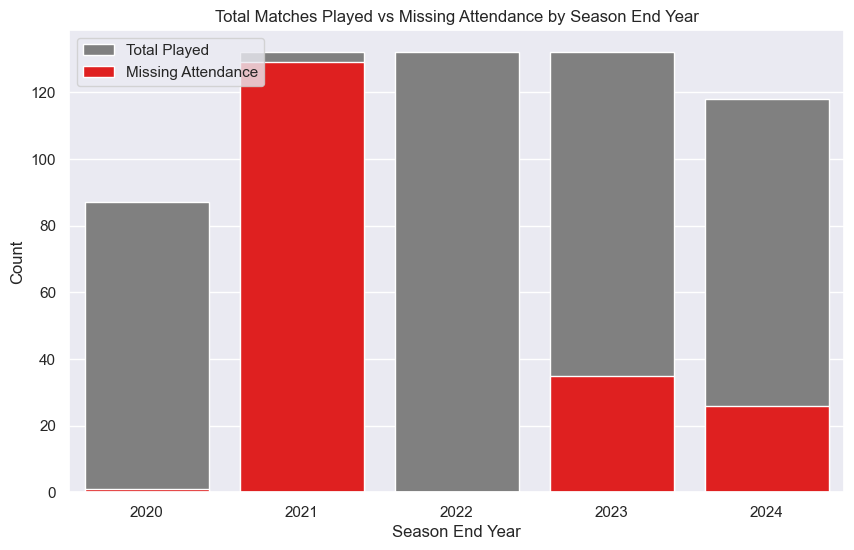

In [ ]:
# Filter matches where attendance is missing
matches_missing_attendance = df_played[df_played['attendance'].isna()]

# Group missing attendance matches by season_end_year and count the missing values
missing_attendance_counts = matches_missing_attendance.groupby('season_end_year').size().reset_index(name='missing_counts')

# Group total matches played by season_end_year and count the total matches
total_matches = df_played.groupby('season_end_year').size().reset_index(name='total_matches')

# Merge total matches and missing counts
merged_df = pd.merge(total_matches, missing_attendance_counts, on='season_end_year', how='left').fillna(0)

# Set up the figure
plt.figure(figsize=(10, 6))

# Plot total matches with adjusted bar width
sns.barplot(data=merged_df, x='season_end_year', y='total_matches', label='Total Played', color='gray')

# Overlay missing attendance counts with adjusted bar width
sns.barplot(data=merged_df, x='season_end_year', y='missing_counts', label='Missing Attendance', color='red')

# Customizing the plot
plt.title('Total Matches Played vs Missing Attendance by Season End Year')
plt.xlabel('Season End Year')
plt.ylabel('Count')

# Move legend to the upper left
plt.legend(loc='upper left')

# Display the plot
plt.show()


In [ ]:
print(f"There were {len(df[(df['season_end_year'] == 2021) & (df['attendance'].isna())])} games played without crowd due to Covid restrictions, during season 2020-21.")

There were 129 games played without crowd due to Covid restrictions, during season 2020-21.


In [ ]:
# Only 3 games were played during in Season 2020-21 with crowd. These games were allowed probably with limited audience as we can see the numbers are low.

df[(df['season_end_year'] == 2021) & (df['attendance'].isna()==False)]

,season_end_year,match_date,match_time,day_of_week,competition_name,competition_country,venue,match_status,referee,home_team,away_team,home_goals,away_goals,home_xg,away_xg,attendance
173,2021,2020-12-06,12:30,Sun,FA Women's Super League,ENG,Cherry Red Records Fans' Stadium,Played,Rebecca Welch,Chelsea,West Ham,3.0,2.0,3.3,1.1,266.0
181,2021,2020-12-13,14:00,Sun,FA Women's Super League,ENG,The People’s Pension Stadium,Played,Lisa Benn,Brighton,Chelsea,0.0,1.0,0.1,0.7,457.0
186,2021,2020-12-20,14:30,Sun,FA Women's Super League,ENG,The People’s Pension Stadium,Played,Abigail Bryne,Brighton,Reading,1.0,3.0,1.6,0.9,365.0


In [ ]:
def venue_attendance_summary(year):
    # Filter the DataFrame for the specified year and 'Played' matches
    df_year = df[(df['season_end_year'] == year) & (df['match_status'] == 'Played')]

    # Identify venues with missing attendance
    venues_missing_attendance = df_year[df_year['attendance'].isna()]['venue'].value_counts()
    
    # Identify venues with given attendance
    venues_with_attendance = df_year[df_year['attendance'].notna()]['venue'].value_counts()

    # Filter venues to include only those where attendance was missing
    filtered_venues = venues_missing_attendance.index

    # Create a DataFrame for missing and given attendance counts
    summary_df = pd.DataFrame({
        'Venue': filtered_venues,
        'Attendance Missing': venues_missing_attendance,
        'Attendance Given': venues_with_attendance.reindex(filtered_venues, fill_value=0)
    }).reset_index(drop=True)

    # Convert counts to integer
    summary_df['Attendance Missing'] = summary_df['Attendance Missing'].astype(int)
    summary_df['Attendance Given'] = summary_df['Attendance Given'].astype(int)

    # Sort by 'Attendance Missing' and 'Attendance Given' columns
    summary_df.sort_values(by=['Attendance Missing', 'Attendance Given'], ascending=False, inplace=True)

    return summary_df.reset_index(drop=True)

In [ ]:
# Lets observe missing audience in season 2023-24 first
print("Exploring missing crowd scenario for season 2023-24")

display(df[(df.season_end_year == 2024) & (df.attendance.isna())].match_status.value_counts())

print("26 out of 118 matches have been played without crowd in 2024.")

print(f"\nVenue attendance summary for the season ending in 2023-24:")

display(venue_attendance_summary(2024))

Exploring missing crowd scenario for season 2023-24


match_status
Played     26
Fixture    22
Name: count, dtype: int64

26 out of 118 matches have been played without crowd in 2024.

Venue attendance summary for the season ending in 2023-24:


,Venue,Attendance Missing,Attendance Given
0,Walton Hall Park,4,5
1,King Power Stadium,4,5
2,Gaughan Group Stadium,4,4
3,Joie Stadium,3,6
4,Prenton Park,3,5
5,Cherry Red Records Fans' Stadium,3,3
6,Chigwell Construction Stadium,2,8
7,Leigh Sports Village Stadium,1,7
8,Stamford Bridge,1,3
9,Pirelli Stadium,1,0


In [ ]:
# Lets observe missing audience in 2022-23

print("Exploring missing crowd scenario for season 2022-23")

display(df[(df.season_end_year == 2023) & (df.attendance.isna())].match_status.value_counts())

print("35 out of 132 matches were played without crowd in 2022-23.")

print(f"\nVenue attendance summary for the season ending in 2022-23:")
display(venue_attendance_summary(2023))


Exploring missing crowd scenario for season 2022-23


match_status
Played    35
Name: count, dtype: int64

35 out of 132 matches were played without crowd in 2022-23.

Venue attendance summary for the season ending in 2022-23:


,Venue,Attendance Missing,Attendance Given
0,The Breyer Group Stadium,6,5
1,Walton Hall Park,5,6
2,Prenton Park,5,6
3,Select Car Leasing Stadium,5,6
4,King Power Stadium,3,8
5,Chigwell Construction Stadium,3,8
6,Meadow Park,3,5
7,Academy Stadium,2,8
8,Leigh Sports Village Stadium,1,8
9,Cherry Red Records Fans' Stadium,1,8


In [ ]:
# Lets observe missing audience in 2021-22

print("Exploring missing crowd scenario for season 2021-22")

display(df[(df.season_end_year == 2022) & (df.attendance.isna())].match_status.value_counts())

print("All 132 matches were played with crowd in 2022-23.")

Exploring missing crowd scenario for season 2021-22


Series([], Name: count, dtype: int64)

All 132 matches were played with crowd in 2022-23.


In [ ]:
# Lets observe missing audience in 2020-21

print("Exploring missing crowd scenario for season 2020-21")

display(df[(df.season_end_year == 2021) & (df.attendance.isna())].match_status.value_counts())

print("All 129/132 matches were played without crowd in 2020-21.")

Exploring missing crowd scenario for season 2020-21


match_status
Played    129
Name: count, dtype: int64

All 129/132 matches were played without crowd in 2020-21.


In [ ]:
print("Exploring missing crowd scenario for season 2019-20")

display(df[(df.season_end_year == 2020) & (df.attendance.isna())].match_status.value_counts())

print("1/88 matches was played without crowd in 2019-20, remaining 45 games were cancelled.")

display(df[(df.season_end_year==2020) & (df.match_status=='Played') & (df.attendance.isna())])

print('Final game of 2019-2020 was played on 19/01/2020, that was without crowd, rest of the games were cancelled.')

Exploring missing crowd scenario for season 2019-20


match_status
Cancelled    45
Played        1
Name: count, dtype: int64

1/88 matches was played without crowd in 2019-20, remaining 45 games were cancelled.


,season_end_year,match_date,match_time,day_of_week,competition_name,competition_country,venue,match_status,referee,home_team,away_team,home_goals,away_goals,home_xg,away_xg,attendance
69,2020,2020-01-19,14:00,Sun,FA Women's Super League,ENG,Walton Hall Park,Played,Peter Shacklady,Everton,Reading,3.0,1.0,2.0,1.1,NaN


Final game of 2019-2020 was played on 19/01/2020, that was without crowd, rest of the games were cancelled.


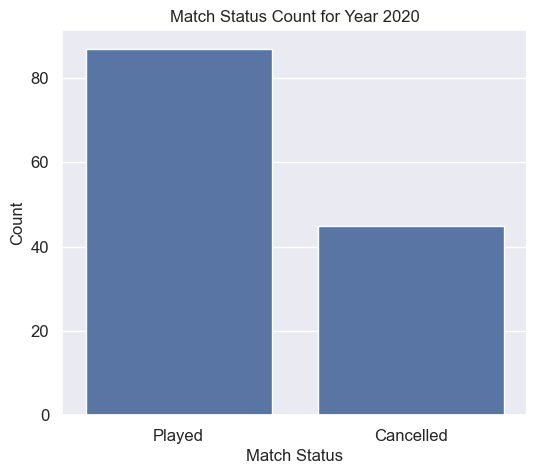

In [ ]:
filtered_df = df[df['season_end_year'] == 2020]

# Create the count plot for 2020
plt.figure(figsize=(6, 5))
sns.countplot(data=filtered_df, x='match_status', order=['Played', 'Cancelled'])
plt.title('Match Status Count for Year 2020', fontsize=12)
plt.xlabel('Match Status', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()




In [ ]:
cancelled_matches_2020 = df[(df['season_end_year'] == 2020) & (df['match_status'] == 'Cancelled')]

print(f"{len(cancelled_matches_2020)} Matches were cancelled from {cancelled_matches_2020.match_date.min()} till {cancelled_matches_2020.match_date.max()}, due to Pandemic.")


45 Matches were cancelled from 2020-01-12 till 2020-05-16, due to Pandemic.


**Let us now analyze statistics for every year**

In [ ]:
# Lets get rid of competition_name and competition_country

competition_name = "FA Women's Super League"
competition_country = "England"

df.drop(columns=['competition_name','competition_country'], inplace=True)

In [ ]:
seasons = [2020, 2021, 2022, 2023, 2024]


for season in seasons:

    df_year = df[df.season_end_year == season]
    summary = column_summary(df_year)
    summary.sort_values(by=['Num Unique Values'], inplace=True)

    print(f"\nSummary Statistics for Season: {season} - Total Matches: {len(df_year)}")

    display(summary)



Summary Statistics for Season: 2020 - Total Matches: 132


,Column,Unique Values,Num Unique Values,Most Frequent Value,Most Frequent Value Count,Missing Values Count,Data Type Check
0,season_end_year,[2020],1,2020,132,0,int64
5,match_status,"[Played, Cancelled]",2,Played,87,0,object
3,day_of_week,"[Sat, Sun, Mon, Fri, Wed, Thu, Tue]",7,Sun,104,0,object
10,away_goals,"[0.0, 1.0, 2.0, 4.0, 3.0, 5.0, 6.0, nan]",8,0.0,30,45,float64
9,home_goals,"[1.0, 0.0, 2.0, 4.0, 3.0, 5.0, 11.0, nan, 6.0,...",10,1.0,26,45,float64
2,match_time,"[15:00, 12:30, 14:00, 14:30, 19:30, 12:00, 14:...",11,14:00,50,6,object
7,home_team,"[Manchester City, Bristol City, Chelsea, Birmi...",12,Arsenal,11,0,object
8,away_team,"[Manchester Utd, Brighton, Tottenham, Everton,...",12,Arsenal,11,0,object
4,venue,"[Etihad Stadium, Stoke Gifford Stadium, Stamfo...",15,Meadow Park,12,0,object
12,away_xg,"[1.1, 2.1, 0.3, 0.8, 1.0, 2.3, 1.7, 0.9, 1.9, ...",30,0.3,7,45,float64



Summary Statistics for Season: 2021 - Total Matches: 132


,Column,Unique Values,Num Unique Values,Most Frequent Value,Most Frequent Value Count,Missing Values Count,Data Type Check
0,season_end_year,[2021],1,2021,132,0,int64
5,match_status,[Played],1,Played,132,0,object
13,attendance,"[nan, 266.0, 457.0, 365.0]",4,266.0,1,129,float64
3,day_of_week,"[Sat, Sun, Wed, Fri, Mon, Thu, Tue]",7,Sun,96,0,object
10,away_goals,"[2.0, 1.0, 0.0, 4.0, 9.0, 5.0, 6.0, 3.0, 7.0]",9,1.0,42,0,float64
9,home_goals,"[0.0, 6.0, 1.0, 2.0, 9.0, 3.0, 4.0, 8.0, 7.0, ...",10,0.0,48,0,float64
7,home_team,"[Aston Villa, Arsenal, Tottenham, Brighton, Br...",12,Arsenal,11,0,object
8,away_team,"[Manchester City, Reading, West Ham, Birmingha...",12,Arsenal,11,0,object
4,venue,"[Villa Park, Meadow Park, The Hive Stadium, Th...",13,Twerton Park Stadium,12,0,object
2,match_time,"[14:30, 12:30, 14:00, 17:20, 13:00, 12:00, 15:...",17,14:00,44,0,object



Summary Statistics for Season: 2022 - Total Matches: 132


,Column,Unique Values,Num Unique Values,Most Frequent Value,Most Frequent Value Count,Missing Values Count,Data Type Check
0,season_end_year,[2022],1,2022,132,0,int64
5,match_status,[Played],1,Played,132,0,object
3,day_of_week,"[Fri, Sat, Sun, Wed, Thu]",5,Sun,93,0,object
9,home_goals,"[2.0, 0.0, 1.0, 3.0, 4.0, 5.0, 7.0, 6.0]",8,0.0,43,0,float64
10,away_goals,"[0.0, 1.0, 4.0, 2.0, 5.0, 3.0, 6.0, 9.0]",8,0.0,51,0,float64
7,home_team,"[Manchester Utd, Aston Villa, Everton, Tottenh...",12,Arsenal,11,0,object
8,away_team,"[Reading, Leicester City, Manchester City, Bir...",12,Arsenal,11,0,object
2,match_time,"[19:45, 12:30, 13:30, 15:00, 14:00, 11:30, 18:...",18,14:00,38,0,object
4,venue,"[Leigh Sports Village Stadium, The Banks's Sta...",19,Academy Stadium,11,0,object
6,referee,"[Abigail Bryne, Helen Conley, Kirsty Dowle, Li...",25,Emily Heaslip,15,0,object



Summary Statistics for Season: 2023 - Total Matches: 132


,Column,Unique Values,Num Unique Values,Most Frequent Value,Most Frequent Value Count,Missing Values Count,Data Type Check
0,season_end_year,[2023],1,2023,132,0,int64
5,match_status,[Played],1,Played,132,0,object
3,day_of_week,"[Fri, Sat, Sun, Wed, Thu]",5,Sun,87,0,object
9,home_goals,"[4.0, 1.0, 2.0, 0.0, 3.0, 5.0, 6.0, 7.0]",8,0.0,35,0,float64
10,away_goals,"[0.0, 3.0, 2.0, 1.0, 8.0, 4.0, 5.0, 6.0]",8,1.0,40,0,float64
7,home_team,"[Arsenal, Manchester Utd, Aston Villa, West Ha...",12,Arsenal,11,0,object
8,away_team,"[Brighton, Reading, Manchester City, Everton, ...",12,Arsenal,11,0,object
4,venue,"[Meadow Park, Leigh Sports Village Stadium, Vi...",19,Chigwell Construction Stadium,11,0,object
2,match_time,"[19:30, 12:00, 12:30, 15:00, 17:00, 13:30, 14:...",23,14:00,36,0,object
6,referee,"[Lisa Benn, Abigail Bryne, Louise Saunders, La...",33,Emily Heaslip,14,0,object



Summary Statistics for Season: 2024 - Total Matches: 140


,Column,Unique Values,Num Unique Values,Most Frequent Value,Most Frequent Value Count,Missing Values Count,Data Type Check
0,season_end_year,[2024],1,2024,140,0,int64
5,match_status,"[Played, Fixture]",2,Played,118,0,object
3,day_of_week,"[Sun, Fri, Sat, Wed]",4,Sun,107,0,object
9,home_goals,"[1.0, 2.0, 0.0, 3.0, 5.0, 4.0, 7.0, nan]",8,1.0,34,22,float64
10,away_goals,"[2.0, 4.0, 1.0, 0.0, 3.0, 5.0, 6.0, 7.0, nan]",9,1.0,44,22,float64
7,home_team,"[Aston Villa, Everton, Bristol City, Arsenal, ...",12,Brighton,13,0,object
8,away_team,"[Manchester Utd, Brighton, Leicester City, Liv...",12,Aston Villa,13,0,object
2,match_time,"[12:30, 13:00, 14:00, 15:00, 17:30, 19:30, 12:...",18,14:00,35,0,object
4,venue,"[Villa Park, Walton Hall Park, Ashton Gate Sta...",22,Broadfield Stadium,12,0,object
6,referee,"[Rebecca Welch, Kirsty Dowle, Elizabeth Simms,...",28,Abigail Byrne,11,22,object


### Analysis Summary of FA Women's Super League Matches

#### Overview
We analyzed a dataset of 668 matches from the FA Women's Super League, covering various match statuses and attendance records. Here are the key findings from the analysis:

#### Match Status Distribution
- **Played:** 601 matches
- **Cancelled:** 45 matches
- **Fixture:** 22 matches

#### Missing Attendance Records
- Attendance records are missing from **191 out of 601** played matches.
- The absence of attendance data can be attributed to multiple factors, one of which is the Covid-19 pandemic, during which matches were played without audiences due to restrictions.

#### Covid-19 Impact on Attendance
- **2020-21 Season:** There were **129 matches** played without spectators due to Covid-19 restrictions.
- **2020 Cancellations:** **45 matches** were cancelled between **2020-01-12 and 2020-05-16** due to the pandemic.

#### Detailed Yearly Analysis
1. **2023-24 Season:**
   - **Total Matches:** 118
   - **Played without Audience:** 26 matches
   - **Fixtures:** 22 matches

2. **2022-23 Season:**
   - **Total Matches:** 132
   - **Played without Audience:** 35 matches

3. **2021-22 Season:**
   - **Total Matches:** 132
   - **Played with Audience:** All matches were played with a crowd.

4. **2020-21 Season:**
   - **Total Matches:** 132
   - **Played without Audience:** 129 matches

5. **2019-20 Season:**
   - **Total Matches:** 88
   - **Played without Audience:** 1 match
   - **Cancelled:** 45 matches
   - **Details:** The final game of the 2019-2020 season was played on 2020-01-19 at Walton Hall Park without a crowd. The rest of the matches were cancelled.

#### Conclusion
The analysis highlights a significant impact of the Covid-19 pandemic on the attendance records and match cancellations. A substantial number of matches during the 2020-21 season were played without an audience, which aligns with the global restrictions in place during that period. Additionally, the trend of matches being played without an audience continued into the 2022-23 and 2023-24 seasons, although to a lesser extent. The 2021-22 season saw all matches played with a crowd, indicating a return to normalcy. In contrast, the 2019-20 season had a significant number of cancellations, with only one match played without an audience. 

This data provides valuable insights into the operational challenges faced by the FA Women's Super League during the pandemic and underscores the importance of maintaining comprehensive records for future analyses.

## Analysis

Task
The league has asked you to analyse whether their growth strategy has been working over the past few
seasons.
Please share a brief report outlining your answers to the following questions, as well as any code you have
used for data cleaning and analysis.

1. How has the quality of the league changed over time?
2. How has the competitive balance of the league changed over time?
3. What are the key drivers of attendances in the league?


## Standing Table Analysis: Tracking Competitive Balance

In our analysis, we'll construct a Standing Table using the available data for the Women's Super League across multiple seasons. This Standing Table will serve as a valuable tool to assess the performance of teams over time, shedding light on the competitive balance within the league.

In [ ]:
# Initialize empty dictionary for standing table
standing_table = {}

# Iterate over each season
for season in df['season_end_year'].unique():
    # Filter data for the current season and only include matches that have been played
    season_data = df[(df['season_end_year'] == season) & (df['match_status'] == 'Played')]
    
    # Initialize dictionary to store team statistics
    team_stats = {}
    
    # Iterate over each team
    for team in set(season_data['home_team']).union(set(season_data['away_team'])):
        # Filter data for the current team
        team_data = season_data[(season_data['home_team'] == team) | (season_data['away_team'] == team)]
        
        # Calculate games played
        games_played = len(team_data)
        
        # Calculate wins, draws, and losses
        home_wins = len(team_data[(team_data['home_team'] == team) & (team_data['home_goals'] > team_data['away_goals'])])
        away_wins = len(team_data[(team_data['away_team'] == team) & (team_data['away_goals'] > team_data['home_goals'])])
        wins = home_wins + away_wins
        
        draws = len(team_data[team_data['home_goals'] == team_data['away_goals']])
        
        # Calculate goals scored and conceded
        home_goals_scored = team_data[team_data['home_team'] == team]['home_goals'].sum()
        away_goals_scored = team_data[team_data['away_team'] == team]['away_goals'].sum()
        total_goals_scored = home_goals_scored + away_goals_scored
        
        home_goals_conceded = team_data[team_data['home_team'] == team]['away_goals'].sum()
        away_goals_conceded = team_data[team_data['away_team'] == team]['home_goals'].sum()
        total_goals_conceded = home_goals_conceded + away_goals_conceded
        
        # Calculate goal difference
        goal_difference = total_goals_scored - total_goals_conceded
        
        # Calculate points
        points = (wins * 3) + draws
        
        # Store team statistics in dictionary
        team_stats[team] = {'GP': games_played, 'W': wins, 'D': draws, 'GD': goal_difference, 'PTS': points}
    
    # Create DataFrame for the standing table
    standing_df = pd.DataFrame.from_dict(team_stats, orient='index').reset_index().rename(columns={'index': 'Team'})
    
    # Sort DataFrame based on points and goal difference
    standing_df = standing_df.sort_values(by=['PTS', 'GD'], ascending=False)
    
    # Add DataFrame to standing table dictionary
    standing_table[season] = standing_df

# Export and display standing Tables
with pd.ExcelWriter('Women_Super_Cup_Table.xlsx') as writer:
    for season, standings in standing_table.items():
        
        sheet_name = str(season)

        standings_with_index = standings.reset_index(drop=True)

        standings_with_index.index = (standings_with_index.index + 1).astype(str)

        standings_with_index.to_excel(writer, sheet_name=sheet_name)

        print(f"Women's Super Cup Table {season}")
        display(standings_with_index)


Women's Super Cup Table 2020


,Team,GP,W,D,GD,PTS
1,Manchester City,16,13,1,30.0,40
2,Chelsea,15,12,3,36.0,39
3,Arsenal,15,12,0,27.0,36
4,Manchester Utd,14,7,2,12.0,23
5,Reading,14,6,3,-3.0,21
6,Tottenham,15,6,2,-9.0,20
7,Everton,14,6,1,0.0,19
8,West Ham,14,5,1,-15.0,16
9,Brighton,16,3,4,-19.0,13
10,Bristol City,14,2,3,-29.0,9


Women's Super Cup Table 2021


,Team,GP,W,D,GD,PTS
1,Chelsea,22,18,3,59.0,57
2,Manchester City,22,17,4,52.0,55
3,Arsenal,22,15,3,48.0,48
4,Manchester Utd,22,15,2,24.0,47
5,Everton,22,9,5,9.0,32
6,Brighton,22,8,3,-20.0,27
7,Reading,22,5,9,-16.0,24
8,Tottenham,22,4,6,-23.0,18
9,Birmingham City,22,3,7,-29.0,16
10,West Ham,22,3,6,-18.0,15


Women's Super Cup Table 2022


,Team,GP,W,D,GD,PTS
1,Chelsea,22,18,2,51.0,56
2,Arsenal,22,17,4,55.0,55
3,Manchester City,22,15,2,38.0,47
4,Manchester Utd,22,12,6,23.0,42
5,Tottenham,22,9,5,1.0,32
6,West Ham,22,7,6,-10.0,27
7,Brighton,22,8,2,-14.0,26
8,Reading,22,7,4,-19.0,25
9,Aston Villa,22,6,3,-27.0,21
10,Everton,22,5,5,-23.0,20


Women's Super Cup Table 2023


,Team,GP,W,D,GD,PTS
1,Chelsea,22,19,1,51.0,58
2,Manchester Utd,22,18,2,44.0,56
3,Arsenal,22,15,2,33.0,47
4,Manchester City,22,15,2,25.0,47
5,Aston Villa,22,11,4,10.0,37
6,Everton,22,9,3,-7.0,30
7,Liverpool,22,6,5,-15.0,23
8,West Ham,22,6,3,-21.0,21
9,Tottenham,22,5,3,-16.0,18
10,Leicester City,22,5,1,-33.0,16


Women's Super Cup Table 2024


,Team,GP,W,D,GD,PTS
1,Manchester City,20,17,1,46.0,52
2,Chelsea,18,15,1,39.0,46
3,Arsenal,20,14,2,27.0,44
4,Manchester Utd,20,10,5,17.0,35
5,Liverpool,19,9,5,2.0,32
6,Tottenham,19,7,6,-6.0,27
7,Aston Villa,20,6,3,-16.0,21
8,Brighton,20,5,4,-16.0,19
9,Everton,20,5,4,-17.0,19
10,Leicester City,20,4,5,-15.0,17


## Analysis of Competitive Balance

### 1. Consistency in Top Performers: 
Top teams like Manchester City, Chelsea, Arsenal, and Manchester United consistently dominate the standings across seasons (in top 4 throughout), showcasing their sustained competitiveness and dominance.

### 2. Fluctuations in Mid-Table Positions: 
While the top teams remain consistent, there are fluctuations in mid-table positions, with teams like Tottenham, Everton, and Aston Villa experiencing variations in their standings, highlighting the dynamic nature of competition.

### 3. Resilience of Lower-ranked Teams: 
Despite consistently occupying lower positions, teams like Birmingham City and Bristol City demonstrate resilience, maintaining their presence in the league despite challenges.

### 4. Emergence of New Contenders: 
Certain teams, like Aston Villa, show a trajectory of improvement, gradually ascending in the standings over seasons, indicating the potential for new contenders to establish themselves in the league.

### Conclusion:
The Women's Super League exhibits a blend of consistency among top-performing teams and a dynamic environment characterized by fluctuations in mid-table positions and the emergence of new contenders. This balance contributes to the overall competitiveness and excitement of the league.

## Quality of Game over time

First Start with average goals scored in each Season.

,season_end_year,average_goals_scored
0,2020,2.977011
1,2021,3.128788
2,2022,2.909091
3,2023,3.325758
4,2024,3.254237


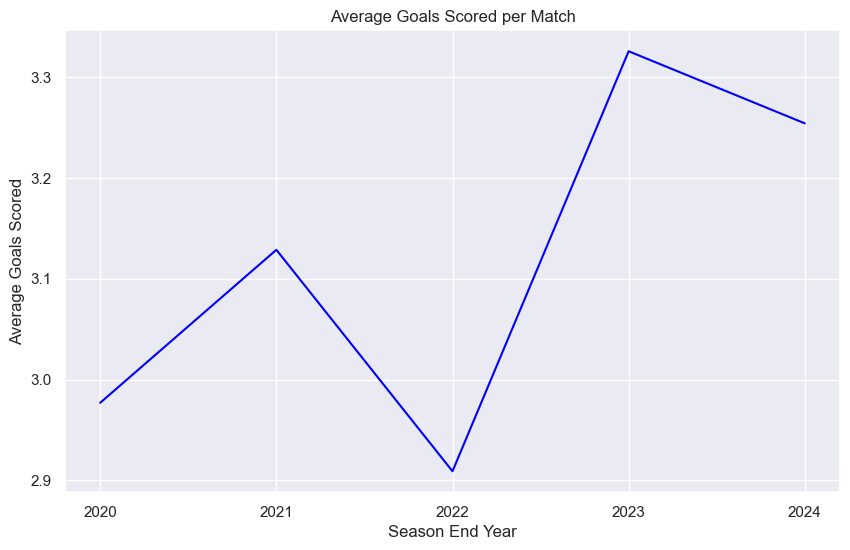

In [ ]:
sns.set()

# Filter data for matches that have been played
played_matches = df[df['match_status'] == 'Played']

# Calculate average goals scored per season
average_goals = played_matches.groupby('season_end_year').agg({'home_goals': 'mean', 'away_goals': 'mean'}).reset_index()

average_goals['average_goals_scored'] = average_goals['home_goals'] + average_goals['away_goals']

# Select relevant columns
average_goals_df = average_goals[['season_end_year', 'average_goals_scored']]

# Display the resulting DataFrame
display(average_goals_df)

plt.figure(figsize=(10, 6))

sns.lineplot(data=average_goals_df, x='season_end_year', y='average_goals_scored', color='blue')

plt.title('Average Goals Scored per Match')

plt.xlabel('Season End Year')
plt.ylabel('Average Goals Scored')

# Set tick
plt.xticks(range(2020, 2025))

plt.grid(True)

plt.show()

## Analysis of Goal Scoring Trends

### 1. Upward Trajectory
The graph displays an overall upward trend in the average goals scored per match across the seasons, suggesting an improvement in the offensive capabilities and tactical approaches of teams, potentially influenced by factors such as player acquisitions, managerial changes, or shifts in playing styles.

### 2. Peak in 2023
The 2023 season witnessed the highest average goals scored per match, implying that the league reached its peak in terms of offensive output and entertaining football during that campaign.

### 3. Dip in 2022
While the trend is predominantly upward, there was temporary dip in 2022, where the average goals scored per match declined compared to the preceding years, infact lowest throughout.

### Conclusion
The upward trajectory in average goals scored per match over the seasons highlights the league's progress in terms of offensive quality and entertainment value. Despite temporary dip, the overall trend suggests an improvement in teams' attacking abilities, contributing to a more exciting football matches for fans and spectators.

,season_end_year,average_home_goals,average_away_goals
0,2020,1.724138,1.252874
1,2021,1.575758,1.553030
2,2022,1.575758,1.333333
3,2023,1.787879,1.537879
4,2024,1.627119,1.627119


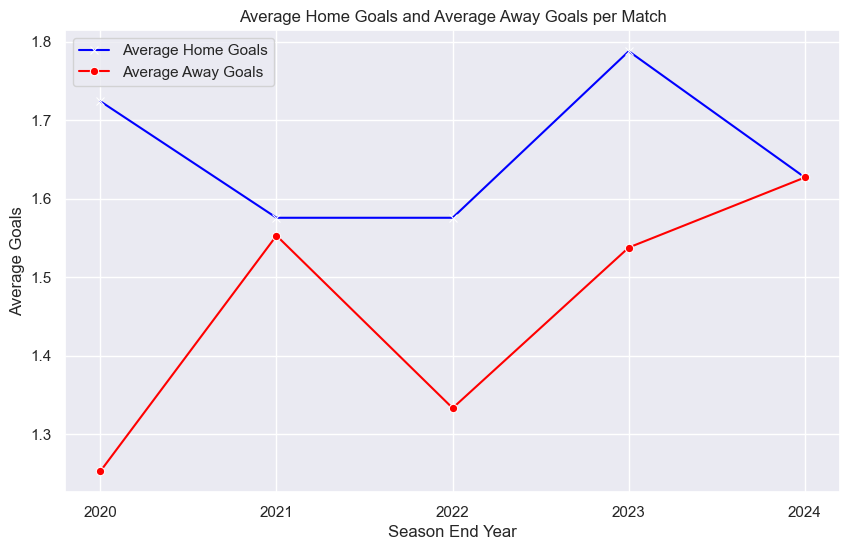

In [ ]:
# Filter data for matches that have been played
played_matches = df[df['match_status'] == 'Played']

# Calculate average goals scored per match for each season
average_goals = played_matches.groupby('season_end_year').agg(
    average_home_goals=('home_goals', 'mean'),
    average_away_goals=('away_goals', 'mean')
).reset_index()

# Display the resulting DataFrame
average_goals_df = average_goals[['season_end_year', 'average_home_goals', 'average_away_goals']]

display(average_goals_df)


# Plotting the results
season_end_year = average_goals_df['season_end_year']
average_home_goals = average_goals_df['average_home_goals']
average_away_goals = average_goals_df['average_away_goals']


plt.figure(figsize=(10, 6))

# Plot Average Goals Scored with regression line
sns.lineplot(x=season_end_year, y=average_home_goals, color='blue', marker='x', label='Average Home Goals')

# Plot Average Goals Conceded with regression line
sns.lineplot(x=season_end_year, y=average_away_goals, color='red', marker='o', label='Average Away Goals')

# Add titles and labels
plt.title('Average Home Goals and Average Away Goals per Match')
plt.xlabel('Season End Year')
plt.ylabel('Average Goals')

# Set x-axis ticks to integer years
plt.xticks(range(2020, 2025))


plt.grid(True)
plt.legend()

# Show plot
plt.show()

Looking at the plot of average home goals and average away goals per season through the lens of how the quality of the league has changed over time, a few insights can be drawn:

1. Inconsistent home advantage: The fluctuating gap between the home and away goals averages suggests an inconsistent home advantage effect within the league across different seasons. A consistent and significant home advantage could be an indicator of a quality disparity between the stronger and weaker teams in the league.

2. Balanced in 2023: The convergence of home and away goals averages in the 2023 season points towards a more balanced and competitive league that year, where the home advantage factor was minimized. This could imply an overall improvement in the quality and competitiveness of teams, resulting in more evenly matched games regardless of venue.

3. Divergence in 2024: The widening gap between home and away goals in the latest 2024 season could signal a potential decline in the competitive balance of the league, with stronger teams asserting a more dominant home advantage over weaker opposition.

4. Scoring levels: While not directly indicative of quality, the overall scoring levels (sum of home and away goals) appear to be relatively consistent across seasons, suggesting no significant changes in the overall attacking potential or defensive solidity within the league over time.

In summary, the fluctuations in the home advantage effect, coupled with the balanced state in 2023, could imply that the quality and competitiveness of the league has varied over the years. The more recent divergence in 2024 may be a cause for concern regarding the competitive balance, but overall scoring levels have remained stable, indicating no drastic shifts in the league's overall quality regarding attacking and defensive abilities.


## Factors influencing Attendance?

For the analysis of Attendance, it is crucial to discard Covid times, including cancelled games, and games played in season 2020-21 (as these games were played spectators). Moreover, for the variable attendances we dont want bias in our data, so normalizing the attendances would make our analysis better. So we first filtered data based on all games played where attendance is not a "nan" and its not in the season 2020-21. We also used only relevant columns in our analysis and removed features like referee, date, match status etc from our analysis.

C:\Users\taha_\AppData\Local\Temp\ipykernel_17676\1606362916.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fd['normalized_attendance'] = fd.apply(lambda row: row['attendance'] / venue_max_attendance[row['venue']], axis=1)


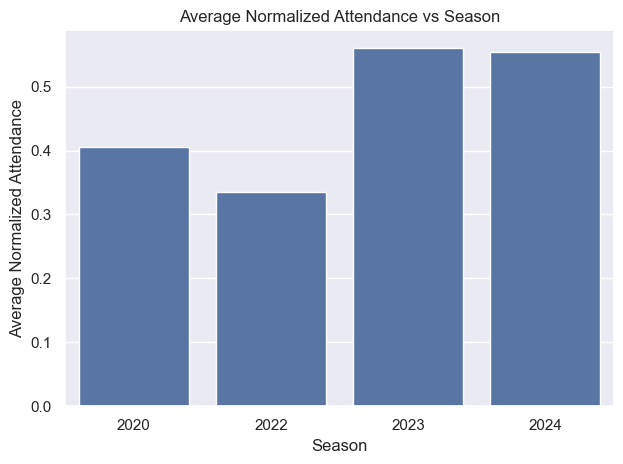

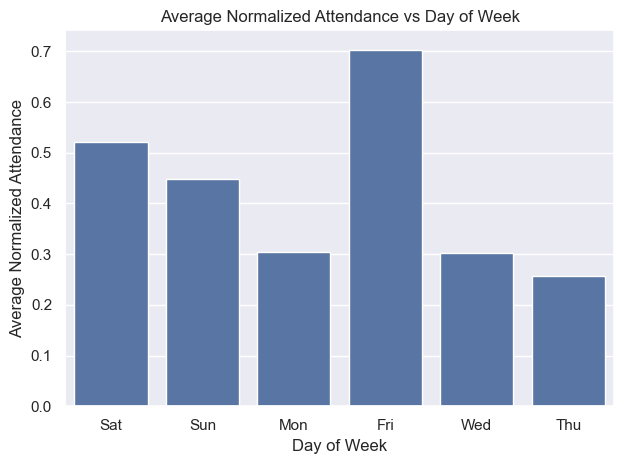

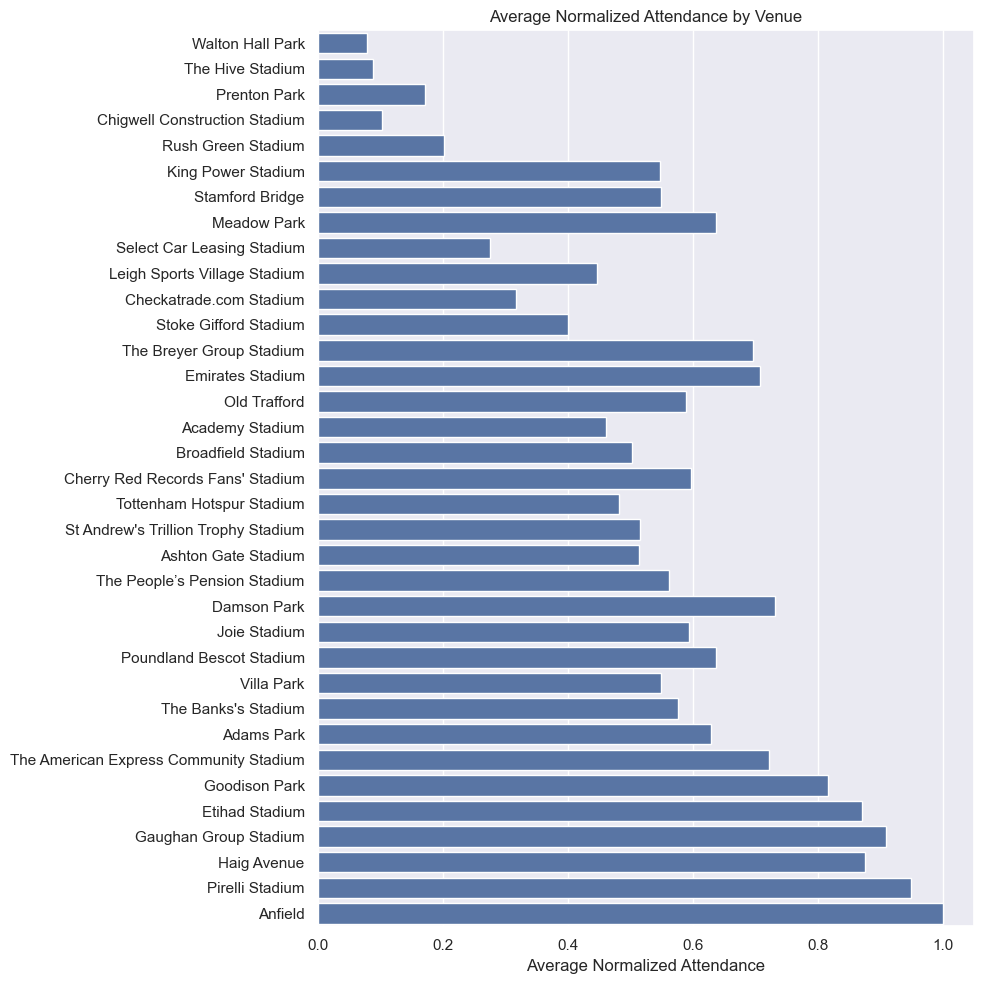

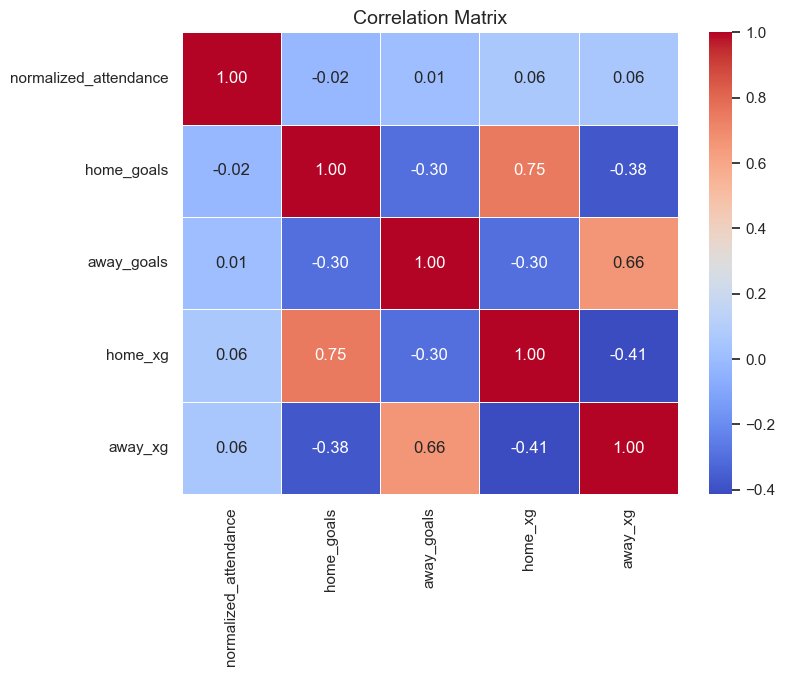

In [ ]:
# Let us study the factors

filtered_data = df[(df.match_status == 'Played') & (df.attendance.isna() != True) & (df.season_end_year != 2021)]

# Filter the dataframe to include only relevant columns

relevant_columns = ['home_team','away_team','season_end_year', 'day_of_week', 'venue', 'home_goals', 'away_goals', 'home_xg', 'away_xg', 'attendance']

fd = filtered_data[relevant_columns]

# Calculate the maximum attendance for each venue
venue_max_attendance = fd.groupby('venue')['attendance'].max()

# Normalize the attendance for each row
fd['normalized_attendance'] = fd.apply(lambda row: row['attendance'] / venue_max_attendance[row['venue']], axis=1)

# Plot bar plots for categorical features against normalized attendance
categorical_features = ['season_end_year', 'day_of_week']

for feature in categorical_features:
    
    sns.barplot(x=fd[feature], y=fd['normalized_attendance'], errorbar=('ci',False))
    plt.xlabel(f'{feature.capitalize()}', fontsize=12)
    plt.ylabel('Average Normalized Attendance', fontsize=12)
    

    if feature == 'season_end_year':
        plt.title(f'Average Normalized Attendance vs Season', fontsize=12)
        plt.xlabel('Season', fontsize=12)

    elif feature == 'day_of_week':
        plt.title(f'Average Normalized Attendance vs Day of Week', fontsize=12)
        plt.xlabel('Day of Week', fontsize=12)

    plt.tight_layout()
    plt.show()
    
 
plt.figure(figsize=(10, 10))
sns.barplot(x='normalized_attendance', y='venue', data=fd, orient='h', errorbar=None, order=fd.sort_values('normalized_attendance')['venue'])
plt.title('Average Normalized Attendance by Venue', fontsize=12)
plt.xlabel('Average Normalized Attendance', fontsize=12)
plt.ylabel(None)
plt.tight_layout()
plt.show()


# Selecting the columns of interest
columns_of_interest = ['normalized_attendance', 'home_goals', 'away_goals', 'home_xg', 'away_xg']

# Creating a correlation matrix
correlation_matrix = fd[columns_of_interest].corr()

# Plotting the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

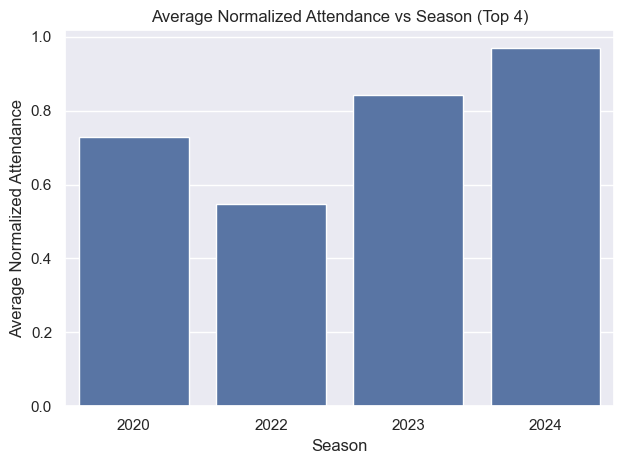

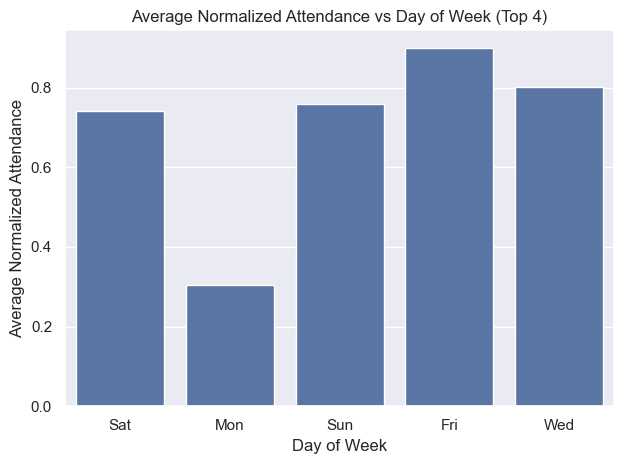

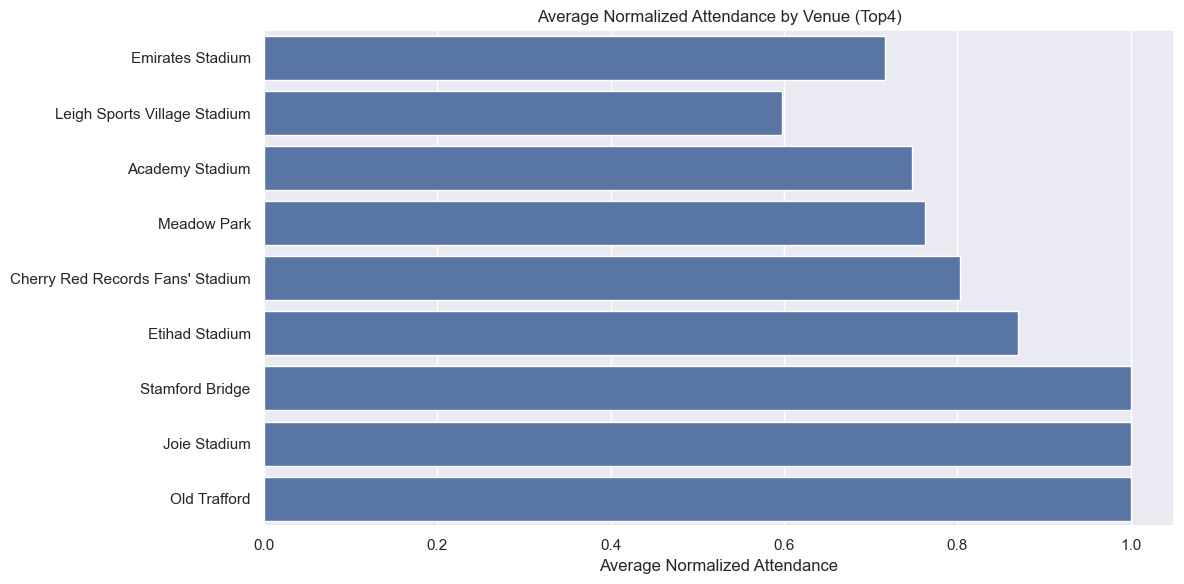

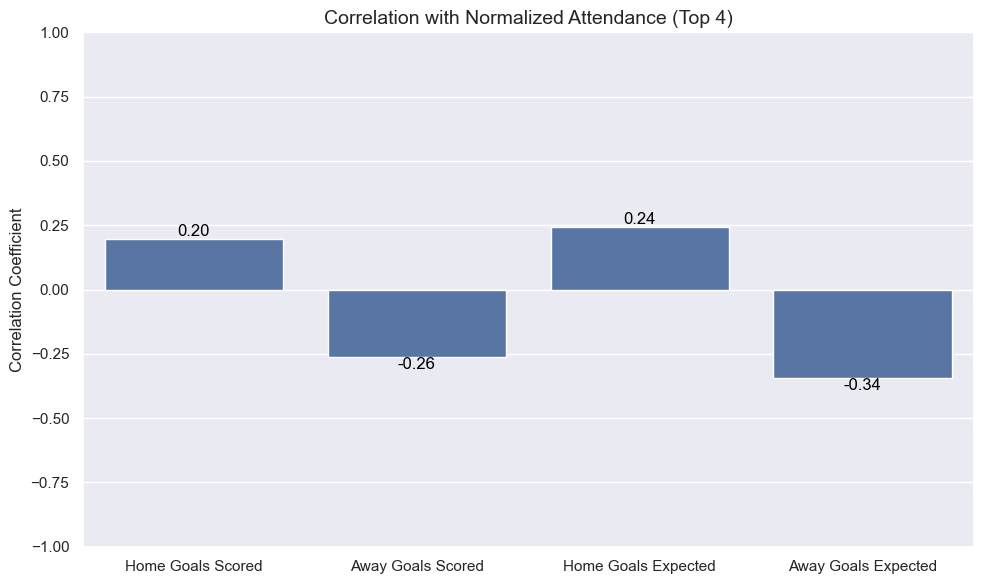

In [ ]:
# Lets see if there is any difference if match is between top teams

# Define the top teams
top_teams = ['Chelsea', 'Arsenal', 'Manchester Utd', 'Manchester City']

# Filter out matches involving the top teams
# top_teams_matches = fd[(fd['home_team'].isin(top_teams)) | (fd['away_team'].isin(top_teams))]

top_teams_matches = fd[(fd['home_team'].isin(top_teams)) & (fd['away_team'].isin(top_teams))]

# Display the filtered DataFrame
fd = top_teams_matches

# Calculate the maximum attendance for each venue
venue_max_attendance = fd.groupby('venue')['attendance'].max()

# Normalize the attendance for each row
fd['normalized_attendance'] = fd.apply(lambda row: row['attendance'] / venue_max_attendance[row['venue']], axis=1)

# Plot bar plots for categorical features against normalized attendance
categorical_features = ['season_end_year', 'day_of_week']

for feature in categorical_features:

    sns.barplot(x=fd[feature], y=fd['normalized_attendance'], errorbar=('ci',False))
    plt.xlabel(f'{feature.capitalize()}', fontsize=12)
    plt.ylabel('Average Normalized Attendance', fontsize=12)


    if feature == 'season_end_year':
        plt.title(f'Average Normalized Attendance vs Season (Top 4)', fontsize=12)
        plt.xlabel('Season', fontsize=12)

    elif feature == 'day_of_week':
        plt.title(f'Average Normalized Attendance vs Day of Week (Top 4)', fontsize=12)
        plt.xlabel('Day of Week', fontsize=12)

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='normalized_attendance', y='venue', data=fd, orient='h', errorbar=None, order=fd.sort_values('normalized_attendance')['venue'])
plt.title('Average Normalized Attendance by Venue (Top4)', fontsize=12)
plt.xlabel('Average Normalized Attendance', fontsize=12)
plt.ylabel(None)
plt.tight_layout()
plt.show()
 


# Selecting the columns of interest
columns_of_interest = ['normalized_attendance', 'home_goals', 'away_goals', 'home_xg', 'away_xg']
# Creating a correlation matrix
correlation_matrix = fd[columns_of_interest].corr()
# Extracting the correlation of normalized_attendance with the other variables
normalized_attendance_corr = correlation_matrix['normalized_attendance'].drop('normalized_attendance')
# Plotting the correlations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=normalized_attendance_corr.index, y=normalized_attendance_corr.values)
# Adding correlation coefficient values on top of the bars
for index, value in enumerate(normalized_attendance_corr.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', color='black')
# Setting clear x-tick labels
plt.xticks(ticks=range(len(normalized_attendance_corr)), labels=['Home Goals Scored', 'Away Goals Scored', 'Home Goals Expected', 'Away Goals Expected'])
plt.title('Correlation with Normalized Attendance (Top 4)', fontsize=14)
plt.xlabel(None)
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
plt.tight_layout()
plt.show()



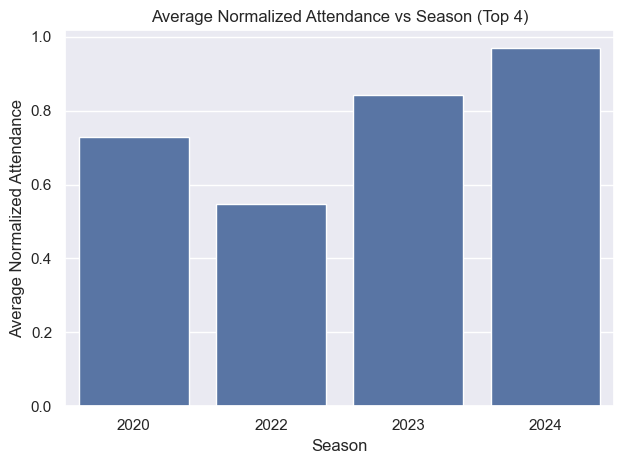

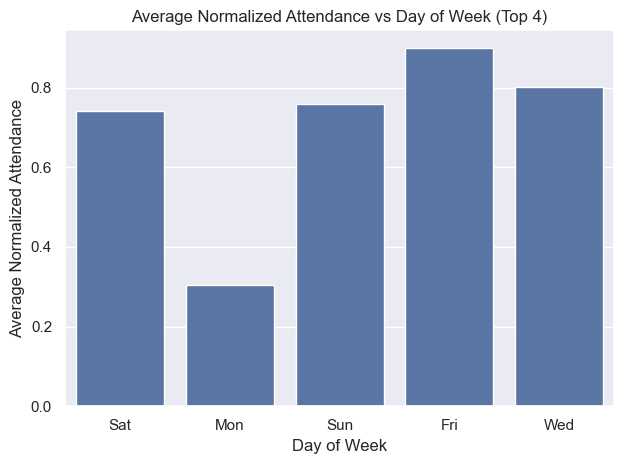

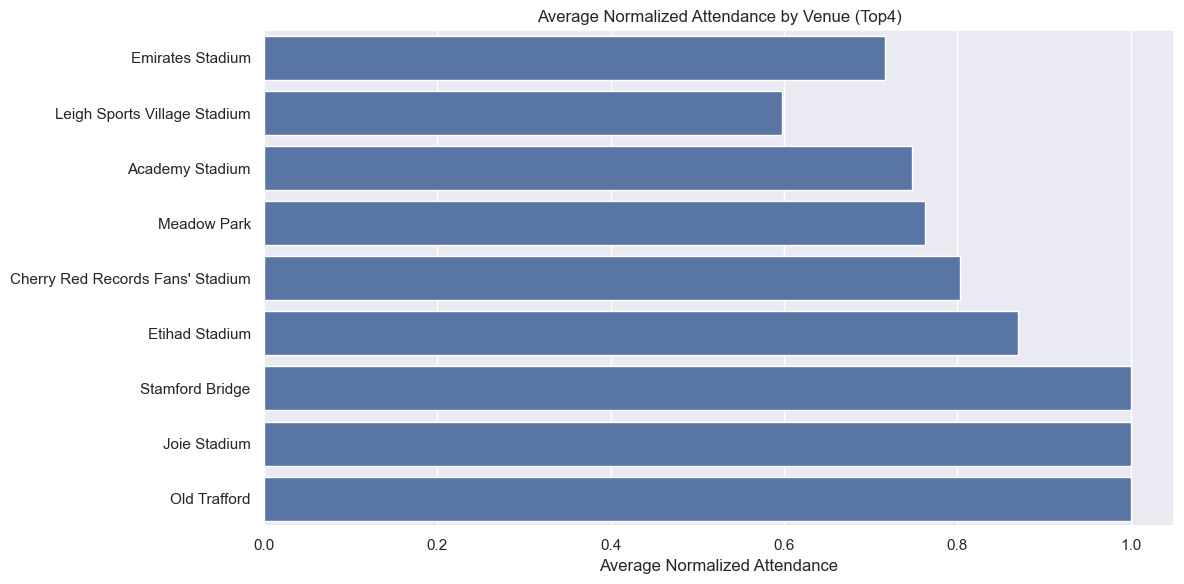

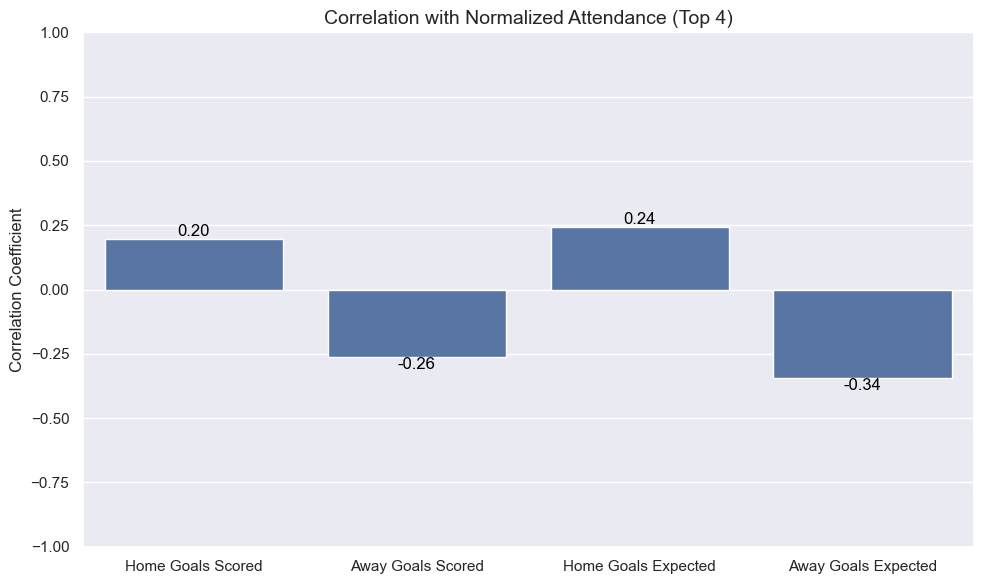

In [ ]:
# Lets see if there is any difference if match includes a team from Top 4

# Define the top teams
top_teams = ['Chelsea', 'Arsenal', 'Manchester Utd', 'Manchester City']

# Filter out matches involving the top teams
# top_teams_matches = fd[(fd['home_team'].isin(top_teams)) | (fd['away_team'].isin(top_teams))]

top_teams_matches = fd[(fd['home_team'].isin(top_teams)) | (fd['away_team'].isin(top_teams))]

# Display the filtered DataFrame
fd = top_teams_matches

# Calculate the maximum attendance for each venue
venue_max_attendance = fd.groupby('venue')['attendance'].max()

# Normalize the attendance for each row
fd['normalized_attendance'] = fd.apply(lambda row: row['attendance'] / venue_max_attendance[row['venue']], axis=1)

# Plot bar plots for categorical features against normalized attendance
categorical_features = ['season_end_year', 'day_of_week']

for feature in categorical_features:

    sns.barplot(x=fd[feature], y=fd['normalized_attendance'], errorbar=('ci',False))
    plt.xlabel(f'{feature.capitalize()}', fontsize=12)
    plt.ylabel('Average Normalized Attendance', fontsize=12)


    if feature == 'season_end_year':
        plt.title(f'Average Normalized Attendance vs Season (Top 4)', fontsize=12)
        plt.xlabel('Season', fontsize=12)

    elif feature == 'day_of_week':
        plt.title(f'Average Normalized Attendance vs Day of Week (Top 4)', fontsize=12)
        plt.xlabel('Day of Week', fontsize=12)

    plt.tight_layout()
    plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='normalized_attendance', y='venue', data=fd, orient='h', errorbar=None, order=fd.sort_values('normalized_attendance')['venue'])
plt.title('Average Normalized Attendance by Venue (Top4)', fontsize=12)
plt.xlabel('Average Normalized Attendance', fontsize=12)
plt.ylabel(None)
plt.tight_layout()
plt.show()
 


# Selecting the columns of interest
columns_of_interest = ['normalized_attendance', 'home_goals', 'away_goals', 'home_xg', 'away_xg']
# Creating a correlation matrix
correlation_matrix = fd[columns_of_interest].corr()
# Extracting the correlation of normalized_attendance with the other variables
normalized_attendance_corr = correlation_matrix['normalized_attendance'].drop('normalized_attendance')
# Plotting the correlations
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x=normalized_attendance_corr.index, y=normalized_attendance_corr.values)
# Adding correlation coefficient values on top of the bars
for index, value in enumerate(normalized_attendance_corr.values):
    plt.text(index, value, f'{value:.2f}', ha='center', va='bottom' if value >= 0 else 'top', color='black')
# Setting clear x-tick labels
plt.xticks(ticks=range(len(normalized_attendance_corr)), labels=['Home Goals Scored', 'Away Goals Scored', 'Home Goals Expected', 'Away Goals Expected'])
plt.title('Correlation with Normalized Attendance (Top 4)', fontsize=14)
plt.xlabel(None)
plt.ylabel('Correlation Coefficient')
plt.ylim(-1, 1)  # Correlation values range from -1 to 1
plt.tight_layout()
plt.show()

## Statistical Analysis of Points Table

In [8]:
# Loading Data for each year as separate dataframes
Year_2020 = pd.read_excel('Women_Super_Cup_Table.xlsx', sheet_name='2020', index_col=0)
Year_2021 = pd.read_excel('Women_Super_Cup_Table.xlsx', sheet_name='2021', index_col=0)
Year_2022 = pd.read_excel('Women_Super_Cup_Table.xlsx', sheet_name='2022', index_col=0)
Year_2023 = pd.read_excel('Women_Super_Cup_Table.xlsx', sheet_name='2023', index_col=0)
Year_2024 = pd.read_excel('Women_Super_Cup_Table.xlsx', sheet_name='2024', index_col=0)

# Add a 'Year' column to each DataFrame
Year_2020['Year'],Year_2021['Year'],Year_2022['Year'],Year_2023['Year'],Year_2024['Year'] = 2020,2021,2022,2023,2024

# Concatenate all DataFrames into one
all_seasons = pd.concat([Year_2020, Year_2021, Year_2022, Year_2023, Year_2024])

# Dictionary to store team metrics DataFrames for each year
team_metrics_yearly = {}

# Iterate over each year
for year in range(2020, 2025):
    # Filter data for the current year
    year_data = all_seasons[all_seasons['Year'] == year]
    
    # Calculate Total Games Played (GP), Wins (W), Draws (D), Goal Difference (GD), and Points (PTS) for each team
    team_metrics = year_data.groupby('Team').agg(
        GP=('GP', 'sum'),
        W=('W', 'sum'),
        D=('D', 'sum'),
        GD=('GD', 'sum'),
        PTS=('PTS', 'sum')
    )
    
    # Calculate Average Points Per Game (PPG) and Average Goal Difference Per Game (GD/GP)
    team_metrics['PPG'] = round(team_metrics['PTS'] / team_metrics['GP'], 2)
    team_metrics['GD/GP'] = round(team_metrics['GD'] / team_metrics['GP'], 2)
    
    # Keep only PPG and GD/GP columns
    team_metrics = team_metrics[['PPG', 'GD/GP']]
    
    # Store the team metrics DataFrame for the current year in the dictionary
    team_metrics_yearly[year] = team_metrics

# Save each year's team metrics to a separate sheet in an Excel file
with pd.ExcelWriter('team_metrics.xlsx') as writer:
    for year, df in team_metrics_yearly.items():
        df.to_excel(writer, sheet_name=str(year))

    # Calculate team metrics for all seasons
    all_seasons_metrics = all_seasons.groupby('Team').agg(
        GP=('GP', 'sum'),
        W=('W', 'sum'),
        D=('D', 'sum'),
        GD=('GD', 'sum'),
        PTS=('PTS', 'sum')
    )
    all_seasons_metrics['PPG'] = round(all_seasons_metrics['PTS'] / all_seasons_metrics['GP'], 2)
    all_seasons_metrics['GD/GP'] = round(all_seasons_metrics['GD'] / all_seasons_metrics['GP'], 2)

    # Save all seasons metrics to a separate sheet
    all_seasons_metrics[['PPG', 'GD/GP']].to_excel(writer, sheet_name='All Seasons')

In [9]:
print('Teams Metrics over time')
display(all_seasons_metrics.sort_values(by='PPG', ascending=False))

for year in range(2020,2025):
    
    print(f"Year {year}")
    display(team_metrics_yearly[year].sort_values(by=['PPG'], ascending=False))

Teams Metrics over time


,GP,W,D,GD,PTS,PPG,GD/GP
Team,,,,,,,
Chelsea,99,82,10,236,256,2.59,2.38
Manchester City,102,77,10,191,241,2.36,1.87
Arsenal,101,73,11,190,230,2.28,1.88
Manchester Utd,100,62,17,120,203,2.03,1.20
Everton,100,34,18,-38,120,1.20,-0.38
Tottenham,100,31,22,-53,115,1.15,-0.53
Liverpool,55,16,13,-25,61,1.11,-0.45
Aston Villa,86,26,16,-65,94,1.09,-0.76
Reading,80,21,18,-72,81,1.01,-0.90


Year 2020


,PPG,GD/GP
Team,,
Chelsea,2.60,2.40
Manchester City,2.50,1.88
Arsenal,2.40,1.80
Manchester Utd,1.64,0.86
Reading,1.50,-0.21
Everton,1.36,0.00
Tottenham,1.33,-0.60
West Ham,1.14,-1.07
Brighton,0.81,-1.19


Year 2021


,PPG,GD/GP
Team,,
Chelsea,2.59,2.68
Manchester City,2.50,2.36
Arsenal,2.18,2.18
Manchester Utd,2.14,1.09
Everton,1.45,0.41
Brighton,1.23,-0.91
Reading,1.09,-0.73
Tottenham,0.82,-1.05
Birmingham City,0.73,-1.32


Year 2022


,PPG,GD/GP
Team,,
Chelsea,2.55,2.32
Arsenal,2.50,2.50
Manchester City,2.14,1.73
Manchester Utd,1.91,1.05
Tottenham,1.45,0.05
West Ham,1.23,-0.45
Brighton,1.18,-0.64
Reading,1.14,-0.86
Aston Villa,0.95,-1.23


Year 2023


,PPG,GD/GP
Team,,
Chelsea,2.64,2.32
Manchester Utd,2.55,2.00
Arsenal,2.14,1.50
Manchester City,2.14,1.14
Aston Villa,1.68,0.45
Everton,1.36,-0.32
Liverpool,1.05,-0.68
West Ham,0.95,-0.95
Tottenham,0.82,-0.73


Year 2024


,PPG,GD/GP
Team,,
Manchester City,2.60,2.30
Chelsea,2.56,2.17
Arsenal,2.20,1.35
Manchester Utd,1.75,0.85
Liverpool,1.68,0.11
Tottenham,1.42,-0.32
Aston Villa,1.05,-0.80
Brighton,0.95,-0.80
Everton,0.95,-0.85


In [ ]:
# with pd.ExcelWriter('complete_analysis_table.xlsx') as writer:

#     all_seasons_metrics.sort_values(by=['PPG']).to_excel(writer, sheet_name='Complete_Table')

In [10]:
averages = {
    'Season_Year': [],
    'PPG_Top_5': [],
    'PPG_Bottom_5': [],
    'GDGP_Top_5': [],
    'GDGP_Bottom_5': []
}

# Iterate over each year's team metrics
for year, metrics in team_metrics_yearly.items():
    # Sort by PPG to get top 5 and bottom 5 teams
    metrics_sorted_ppg = metrics.sort_values(by='PPG', ascending=False)
    top_5_ppg = metrics_sorted_ppg.head(5)
    bottom_5_ppg = metrics_sorted_ppg.tail(5)

    # Calculate the averages
    ppg_top_5_avg = top_5_ppg['PPG'].mean()
    ppg_bottom_5_avg = bottom_5_ppg['PPG'].mean()
    gdgp_top_5_avg = top_5_ppg['GD/GP'].mean()
    gdgp_bottom_5_avg = bottom_5_ppg['GD/GP'].mean()

    # Append to the averages dictionary
    averages['Season_Year'].append(year)
    averages['PPG_Top_5'].append(ppg_top_5_avg)
    averages['PPG_Bottom_5'].append(ppg_bottom_5_avg)
    averages['GDGP_Top_5'].append(gdgp_top_5_avg)
    averages['GDGP_Bottom_5'].append(gdgp_bottom_5_avg)

# Create the final DataFrame from the averages dictionary
averages_df = pd.DataFrame(averages)

# Save the averages DataFrame to an Excel file
averages_df.to_excel('top_bottom_averages.xlsx', index=False)
